![test](../notebooks/images/header2.png)

# Workshop goals
* MNIST dense model review
* Generating new data
* Convolutional networks
* Using pretrained models

# How to get and open this file:
1. `git pull`
1. `jupyter notebook`

# Let's revisit the MNIST example

Here's the dense network we used with two layers, the first using relu activation.

In [33]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

orig_image = train_images[0]

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

reshaped_image = train_images[0]

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=20, batch_size=256);
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.3641 - acc: 0.8941
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1725 - acc: 0.9496
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1287 - acc: 0.9628
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.1049 - acc: 0.9689
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0900 - acc: 0.9732
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0789 - acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0716 - acc: 0.9780
Epoch 8/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0659 - acc: 0.9799
Epoch 9/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0592 - acc: 0.9821
Epoch 10/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0564 - acc: 0.9827

Running this model for 10 epochs gives a training accuracy of 99.6% and a testing accuracy of 97.9% percent. Further training (up to about 30 epochs) gives a training accuracy of 100% and a testing accuracy of 98%. Even after 10 epochs it's overfit. This is also a fairly easy problem - clean data, small images, greyscale, only 10 classes, etc. We'll need a new technique to get better results.

The images were originally 28 by 28 pixel images. As part of our data preparation for a dense network, we flatten or reshaped them into linear arrays of 784 numbers. However, this is throwing away important information - pixel clumps clearly have information that we are losing by reshaping.

In [31]:
print(f"Shape of original images: {orig_image.shape}")
print(f"Reshaped to linear array: {reshaped_image.shape}")

Shape of original images: (28, 28)
Reshaped to linear array: (784,)


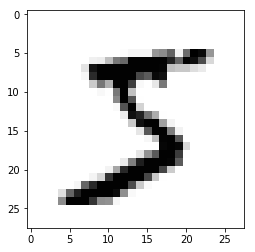

In [62]:
plt.imshow(orig_image, cmap='Greys');

Let's examine the top bar of the 5 in both formats to compare: 

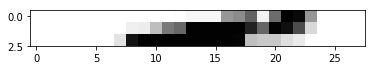

In [70]:
plt.imshow(orig_image[5:8,:], cmap='Greys');

In [80]:
print(reshaped_image[140:225])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333336
 0.6862745  0.10196079 0.6509804  1.         0.96862745 0.49803922
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.11764706 0.14117648 0.36862746 0.6039216  0.6666667  0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.88235295 0.6745098
 0.99215686 0.9490196  0.7647059  0.2509804  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.19215687 0.93333334 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.9843137  0.3647059  0.32156864 0.32156864 0.21960784
 0.15294118 0.         0.         0.         0.         0.
 0.        ]


The dense model that we trained above is able to use individual pixels and patterns of pixels but is not able to detect translations and rotations. If the network sees a slightly different `5` than is expects, it probably won't correctly classify it.

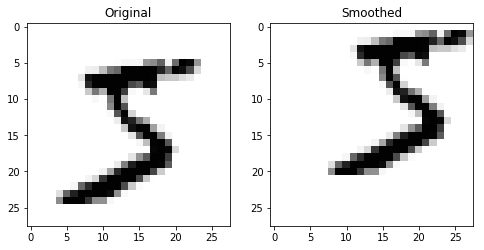

In [232]:
trans_image = np.zeros([28,28])
trans_image[:24, 4:] = orig_image[4:, :24]

f = plt.figure(figsize=(8, 8))
ax1 = f.add_subplot(121)
ax1.imshow(orig_image, cmap='Greys')
ax1.set_title("Original")

ax2 = f.add_subplot(122)
ax2.imshow(trans_image, cmap='Greys')
ax2.set_title("Smoothed");

One possible approach is to programmatically generate different versions of the current images. The Keras image library has lots of utilities for working with images.

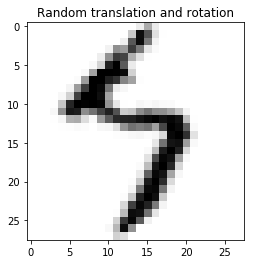

In [237]:
from keras.preprocessing import image

data_generator = image.ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2)
orig_image_rank_4 = orig_imag.reshape((1,28,28,1))
batch = data_generator.flow(orig_image_rank_4, batch_size=1)
plt.imshow(batch[0].reshape(28,28), cmap='Greys')
plt.title("Random translation and rotation");

This can help in some situations but since we aren't really generating new training data, just preturbations of the current training data, we will probably still have overfitting.

# Convolution Neural Networks

### The convolution operation in image processing

The main idea behind convolution is that we explicitly encode pixels patterns by moving **kernels** aka **filter windows** over the image, creating output features. What do I mean by kernels?

A kernel is just a matrix of the same shape as our input data - in this case a 2d matrix. It's usually much smaller in size than the data, 3 x 3 is a common size.

The output image is calculated by sliding the kernel over the input data and calculating the sum of the surrounding pixels, weighted by the corresponding values of the kernal. This is not a standard matrix multiplication.

Example calculation of the entry in first row,first column output:

$$
\begin{pmatrix}
2 & 3 & 4 & 2 & 4 \\
0 & 1 & 4 & 1 & 1 \\
1 & 1 & 0 & 7 & 2 \\
3 & 2 & 3 & 1 & 1 \\
1 & 2 & 0 & 2 & 8
\end{pmatrix}
*
\begin{pmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{pmatrix}
=>
\begin{pmatrix}
 -7 & . & . \\
 . & . & . \\
 . & . & .
\end{pmatrix}
$$

where the actual calculation is $-2 + -3 + -4 + 8 + -4 + -1 + -1 = -7$. The dots in the output matrix are filled in by sliding kernel to a different part of the input matrix. 

Note that the output matrix is smaller than the input matrix. This is because the kernal can only fit in the input matrix in only 9 unique places. This is called a **valid padding**. 

This is not the only choice - we can also have a **same padding**, where we add the input matrix with enough zeros on all sides so that output matrix is the same size as the input matrix:

$$
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 2 & 3 & 4 & 2 & 4 & 0 \\
0 & 0 & 1 & 4 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 7 & 2 & 0 \\
0 & 3 & 2 & 3 & 1 & 1 & 0 \\
0 & 1 & 2 & 0 & 2 & 8 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0  
\end{pmatrix}
*
\begin{pmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{pmatrix}
=>
\begin{pmatrix}
 . & . & . & . & . \\
 . & -7 & . & . & . \\
 . & . & . & . & . \\
 . & . & . & . & . \\
 . & . & . & . & .
\end{pmatrix}
$$

There's yet another choice we can make that affect the size of the output matrix: **strides**. We may choose to move the kernel over more than one entry, i.e. skip entries. 

For Keras Conv2D layers the default values are `strides=1, padding='valid'`

Image processing gives us several important filters to reduce image noise, find edges, etc ... In the interest of time, we'll skip are more in-depth explanation of these work but there are many good explanations a Google search away. Instead, I'll just demonstrate some of the more popular kernels:

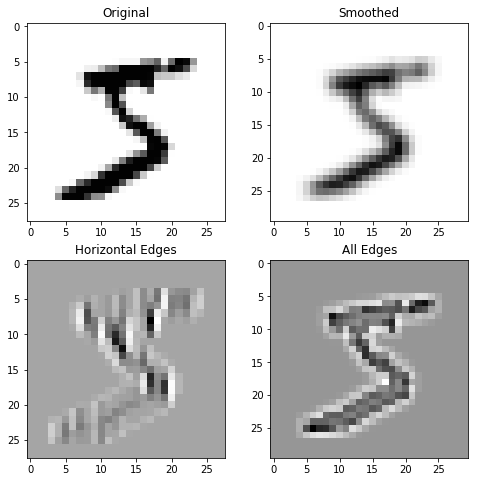

In [239]:
from scipy.signal import convolve2d
import numpy as np

# Calculate the convolutions

smoothing_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
smooth = convolve2d(orig_imag, smoothing_kernel)

horizontal_edge = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
h_edge = convolve2d(orig_imag, horizontal_edge, 'same')

vertical_edge = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
h_edge = convolve2d(orig_imag, vertical_edge, 'same')

edge_detector = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge = convolve2d(orig_imag, edge_detector, 'same')

# Plot the resulting images

f = plt.figure(figsize=(8, 8))
ax1 = f.add_subplot(221)
ax1.imshow(orig_image, cmap='Greys')
ax1.set_title("Original")

ax2 = f.add_subplot(222)
ax2.imshow(smooth, cmap='Greys')
ax2.set_title("Smoothed")

ax3 = f.add_subplot(223)
ax3.imshow(h_edge, cmap='Greys')
ax3.set_title("Horizontal Edges")

ax4 = f.add_subplot(224)
ax4.imshow(edges, cmap='Greys')
ax4.set_title("All Edges");

One nice property of these image filter kernels is that they are able to detect features no matter where they are in the image. Look at the edge detectors above - all the horizontal edges are highlighted. Hopefully, this will help us build translationally invariant image classifiers!

There is a drawback of course. These kernels are predefined. We want to learn good kernals from our data. We can do this with convolution layers in Keras.

Let's build a model and then we'll explain the steps in more detail.

In [276]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu')) 
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu', input_shape=(784,)))
# network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                36928     
__________

In [277]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [288]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(train_images,
                      train_labels,
                      epochs=10,
                      batch_size=64,
                      validation_data=(test_images, test_labels));
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 785us/step - loss: 0.0073 - acc: 0.9978 - val_loss: 0.0428 - val_acc: 0.9925
Epoch 2/10
60000/60000 [==============================] - 46s 760us/step - loss: 0.0060 - acc: 0.9982 - val_loss: 0.0505 - val_acc: 0.9911
Epoch 3/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0059 - acc: 0.9982 - val_loss: 0.0536 - val_acc: 0.9916
Epoch 4/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0564 - val_acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 46s 768us/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0496 - val_acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 46s 762us/step - loss: 0.0047 - acc: 0.9989 - val_loss: 0.0499 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.

### Aside - GPU training

You'll notice this is much slower - many more calculations are happening! If we make the networks even larger, or train on larger images or have more of them, we'll quickly get to a point where training time is the greatest barrier to training better models. Ultimately, you'll want to use a GPU to train models.

You'll have to install some GPU specific mathematical calculation libraries and a GPU specific version of tensorflow. Look for online resources for this.

Sources for GPU training:
1. Use a local NVIDIA GPU
1. Online using Google Colab - hosted Jupyter notebooks with free GPUs
1. Online using AWS
1. Other cloud providers - IBM, paperspace - A quick glance at prices show online providers are 25 cents/hour and up.
1. Don't train models from scratch!

### Let's look at the results!

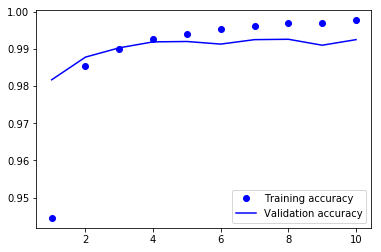

In [287]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.show()

### Let's look at the results!

Original MLP validation error = 1.6%, CNN validation error = 0.8%. So we've cut the error in half with our first attempt at building at CNN.

The first convolutional layer and it's summary looks like this:

`Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))`

```
_______________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
```

Since it's the first layer we have to tell it that we are using 28 x 28 images with only 1 color. RGB color images would be (28, 28, 3).

We are specifying that we want to create 32 kernels, each 3 x 3. Each kernel leads to an output neuron with the relu activation. Thus we are learning 10 values for each kernel - 9 for the kernel itself and one weight, 320 parameters in total.

What about the output shape? The first entry is the batch size, which is variable, and so is listed as None. The other numbers represent the 26 x 26 images (shruken by the convolution) and the outputs of the 32 convolutions.

Notice we really expanded the amount of data. Each input image has turned into 32 slightly smaller outputs images after the first layer. This has the effect of increasing training time significantly. Max pooling is a way to decrease the number of parameters. In this case we simply tell the layer to split each image up into 2 by 2 blocks and output the max value.

MaxPooling also helps the network detect slightly translated features and to generalize.

Next we have two more convolution layers, separated by a max pooling layer. 

Why do we have multiple convolution layers? It's because each successive layer can learn more and more complex shapes. The first layer is looking for 3 x 3 patterns in the images - curves or straight lines. The second layer looks for combinations of the first layer features - like a circle. The final layer will look for even more complocated features. Convolutional layers can learn spacial heirarchies.

Let's examine that by putting a single image into our trained network and examining the filter outputs of each convolution layer. - code adapted from *Deep Learning with Python* by Francois Chollet.

In [385]:
layer_outputs = [network.layers[i].output for i in [0,2,4]]
activation_model = models.Model(inputs=network.input, outputs=layer_outputs)
activations = activation_model.predict(test_images[image_number].reshape((1,28,28,1)))
layer_names = [ network.layers[i].name for i in [0,2,4]]

Since the kernel initialization is random, your feature maps won't look exactly like mine!

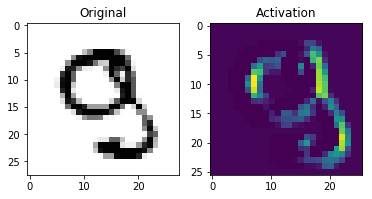

In [395]:
image_number = 151
plt.subplot(1,2,1)
plt.imshow(test_images[image_number].reshape((28,28)), cmap='Greys');
plt.title("Original")
plt.subplot(1,2,2)
activations = activation_model.predict(test_images[image_number].reshape((1,28,28,1)))
plt.imshow(activations[0][0, :, :, 5])
plt.title("Activation")
plt.show();

/Users/tjbay/anaconda2/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


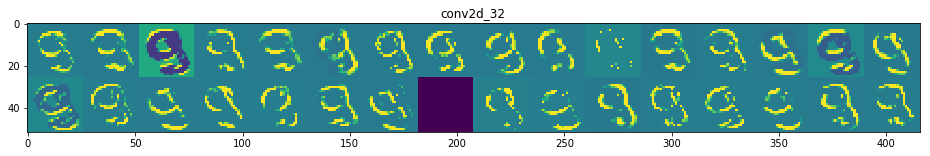

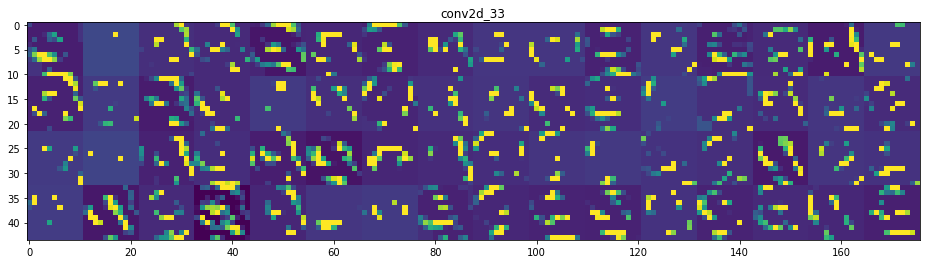

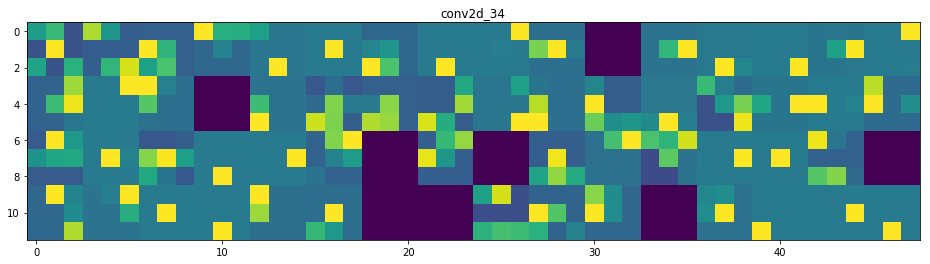

In [396]:
images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

The first conv layer tends to be visually pretty close to the original image and looks similar to the edge detector filters.

The second layer is more abstract but some still show hints of image. By looking at a bunch of different images we might be able to identify filters that detect certain shapes, e.g. circles, horizontal or vertical lines.

By the third layer it's almost impossible to tell what the original number was. The data has been turned into a set of abstract features. We also see more filters as blank, indicating that they weren't activated at all by this input image. 

Since the last convolution layer outputs a bunch of abstract features, we need to add a small dense network on top to finish the actual classification.

The **Flatten** layer simply unrolls the 2D image data into the linear array that the Dense layers expect, much like the **reshape** function we've used a few times.

### Pretrained models

We saw that this small network (60k training images, 93k parameters) takes minutes to train on my laptop. World class 